In [6]:
# чтобы изменения в других файлах автоматически подгружались в импорты
%load_ext IPython.extensions.autoreload
%autoreload 2

In [44]:
import sys

sys.path.append('..') # i dont know - stack overflow (иначе нельзя импортировать из папки выше)

import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime as dt

from model import FinData
from model import train_valid_split, train_valid_test_split
from model import CatboostFinModel

from datetime import datetime

In [45]:
data = FinData("../datasets/T_yandex_10min.csv")

windows_ma = [2, 4, 6, 18, 30, 50, 500, 1000] # здесь можно менять окна для признаков и пробовать другие
shifts_norms = [2, 3, 4, 5, 6]

data.insert_time_features()
data.make_binary_class_target()
data.insert_rolling_means(windows_ma)
data.insert_shifts_norms(shifts_norms)
data.insert_exp_rolling_means(windows_ma)
data.insert_random_prediction()

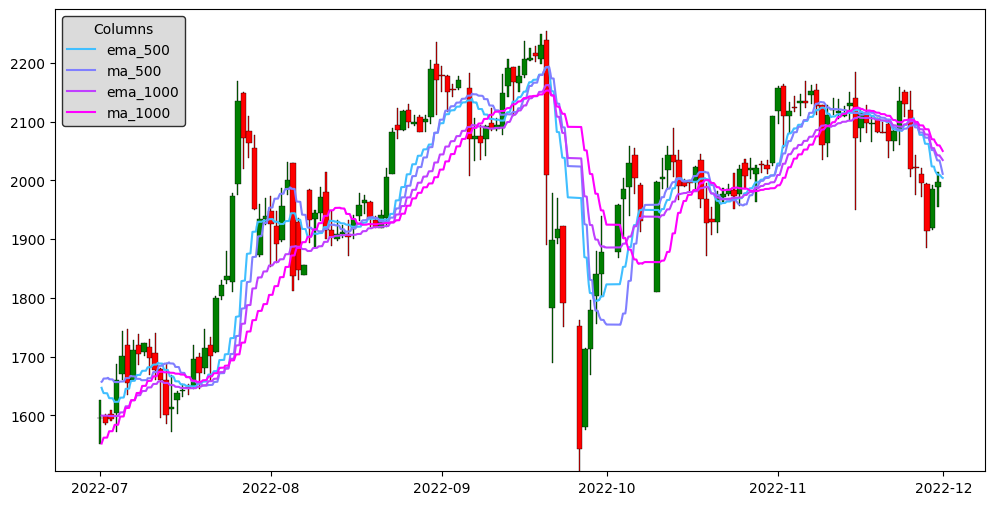

In [55]:
data.visualize_time_frame(datetime(2022, 7, 1), datetime(2022, 12, 1), columns=['candle', 'ema_500', 'ma_500', 'ema_1000', 'ma_1000'], candle_freq='1d', cmap='cool', line_kwargs={'linewidth': 1.5})

Пример с отрисовкой предсказаний

In [24]:
numeric = ['ma_2', 'close_normed_ma_2',
       'ma_4', 'close_normed_ma_4', 'ma_6', 'close_normed_ma_6', 'ma_18',
       'close_normed_ma_18', 'ma_30', 'close_normed_ma_30', 'ma_50',
       'close_normed_ma_50', 'ma_1000', 'close_normed_ma_1000',
       'close_norms_2', 'close_high_norms_2', 'high_norms_2', 'low_norms_2',
       'close_norms_3', 'close_high_norms_3', 'high_norms_3', 'low_norms_3',
       'close_norms_4', 'close_high_norms_4', 'high_norms_4', 'low_norms_4',
       'close_norms_5', 'close_high_norms_5', 'high_norms_5', 'low_norms_5',
       'close_norms_6', 'close_high_norms_6', 'high_norms_6', 'low_norms_6',
       'ema_2', 'close_normed_ema_2', 'ema_4', 'close_normed_ema_4', 'ema_6',
       'close_normed_ema_6', 'ema_18', 'close_normed_ema_18', 'ema_30',
       'close_normed_ema_30', 'ema_50', 'close_normed_ema_50', 'ema_1000',
       'close_normed_ema_1000']

cat = []

args = {"iterations" : 20, 
        "depth" : 5, 
        "learning_rate" : 0.01,
        "use_best_model" : True, 
        "l2_leaf_reg" : 200,
        "loss_function" : 'CrossEntropy', 
        "eval_metric" : 'Accuracy', 
        "cat_features" : cat, 
        "random_state" : 42,
        "early_stopping_rounds" : 5000}

In [20]:
X_train, X_val, y_train, y_val = train_valid_split(data=data.df, 
                                                   year=2024, month=12, day=5, 
                                                   numeric=numeric, cat=cat, target="direction_binary")

In [25]:
model = CatboostFinModel(args)

model.set_datasets(X_train, X_val, y_train, y_val)
model.set_features(numeric, cat)

model.fit()

0:	learn: 0.5568525	test: 0.5909091	best: 0.5909091 (0)	total: 24.5ms	remaining: 466ms
1:	learn: 0.5586997	test: 0.5959596	best: 0.5959596 (1)	total: 47.8ms	remaining: 430ms
2:	learn: 0.5590871	test: 0.6212121	best: 0.6212121 (2)	total: 72.3ms	remaining: 410ms
3:	learn: 0.5600778	test: 0.6111111	best: 0.6212121 (2)	total: 99.9ms	remaining: 400ms
4:	learn: 0.5604800	test: 0.6212121	best: 0.6212121 (2)	total: 130ms	remaining: 391ms
5:	learn: 0.5596755	test: 0.6111111	best: 0.6212121 (2)	total: 161ms	remaining: 377ms
6:	learn: 0.5594893	test: 0.6111111	best: 0.6212121 (2)	total: 192ms	remaining: 357ms
7:	learn: 0.5592510	test: 0.6111111	best: 0.6212121 (2)	total: 220ms	remaining: 330ms
8:	learn: 0.5599511	test: 0.6161616	best: 0.6212121 (2)	total: 246ms	remaining: 300ms
9:	learn: 0.5596159	test: 0.6161616	best: 0.6212121 (2)	total: 278ms	remaining: 278ms
10:	learn: 0.5600480	test: 0.6111111	best: 0.6212121 (2)	total: 310ms	remaining: 254ms
11:	learn: 0.5600405	test: 0.6111111	best: 0.6212

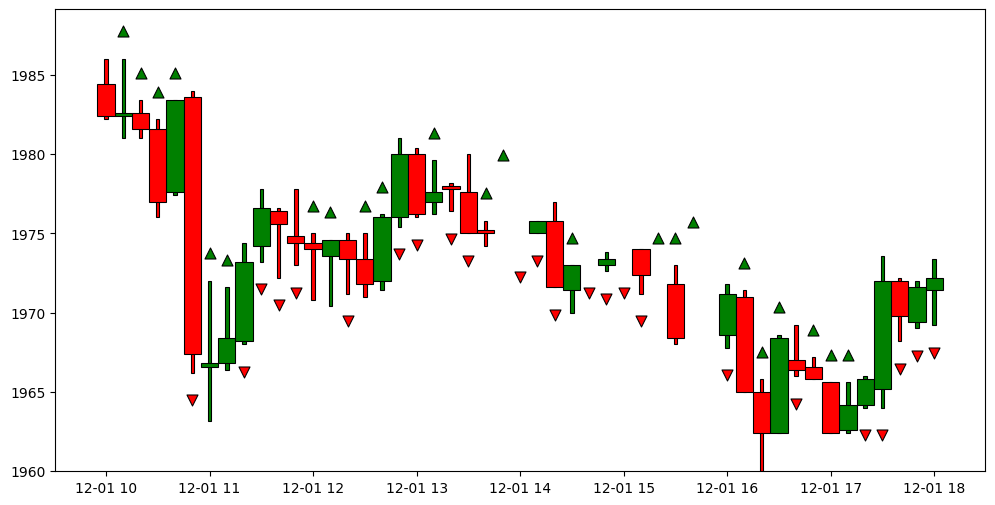

In [ ]:
data.visualize_time_frame(datetime(2022, 12, 1, 10), datetime(2022, 12, 1, 18), predictor=model)